<a href="https://colab.research.google.com/github/EastWon0103/Data_Science_P1/blob/main/%EA%B9%80%EB%8F%99%EC%9B%90_20181580_p01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls

owid-covid-data.csv  sample_data


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.optim as optim

In [ ]:
'''
TASK 1-1: 데이터 불러오기

데이터의 문제가 있는 라인은 스킵
'''

covid_data = pd.read_csv("./owid-covid-data.csv", error_bad_lines=False)

covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127812,ZWE,Africa,Zimbabwe,2021-10-28,132880.0,72.0,48.571,4675.0,0.0,1.857,8804.565,4.771,3.218,309.763,0.000,0.123,0.76,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3966.0,1365439.0,90.473,0.263,3180.0,0.211,0.015,65.5,tests performed,5896902.0,3306845.0,2590057.0,NaN,14221.0,14231.0,39.07,21.91,17.16,NaN,943.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
127813,ZWE,Africa,Zimbabwe,2021-10-29,132926.0,46.0,48.286,4675.0,0.0,1.714,8807.613,3.048,3.199,309.763,0.000,0.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2740.0,1368179.0,90.655,0.182,3018.0,0.200,0.016,62.5,tests performed,5914009.0,3315108.0,2598901.0,NaN,17107.0,14174.0,39.19,21.97,17.22,NaN,939.0,44.44,15092171.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,Na

In [ ]:
'''
TASK 1-2: ‘date’ 열의 데이터를 날짜 타입으로 변경하기‘date’ 열의 데이터를 날짜 타입으로 변경하기
에러처리
'''
covid_data["date"] = pd.to_datetime(covid_data["date"], errors='coerce')

covid_data["date"]

0        2020-02-24
1        2020-02-25
2        2020-02-26
3        2020-02-27
4        2020-02-28
            ...    
127812   2021-10-28
127813   2021-10-29
127814   2021-10-30
127815   2021-10-31
127816   2021-11-01
Name: date, Length: 127817, dtype: datetime64[ns]

In [ ]:
'''
iso_code가 한국(KOR)인 데이터프레임 생성
iso_code가 일본(JPN)인 데이터프레임 생성

'''

kor_covid_data = covid_data.loc[covid_data["location"] == "South Korea",:]
jpn_covid_data = covid_data.loc[covid_data["location"] == "Japan",:]

kor_covid_data = kor_covid_data.sort_values(by='date') #데이트를 기준으로 정렬
jpn_covid_data = jpn_covid_data.sort_values(by='date') #데이트를 기준으로 정렬

kor_covid_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
106671,KOR,Asia,South Korea,2020-01-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,0.000,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106672,KOR,Asia,South Korea,2020-01-22,1.0,NaN,NaN,NaN,NaN,NaN,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,16.0,0.000,0.000,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106673,KOR,Asia,South Korea,2020-01-23,1.0,0.0,NaN,NaN,NaN,NaN,0.019,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106674,KOR,Asia,South Korea,2020-01-24,2.0,1.0,NaN,NaN,NaN,NaN,0.039,0.019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,0.000,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
106675,KOR,Asia,South Korea,2020-01-25,2.0,0.0,NaN,NaN,NaN,NaN,0.039,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,people tested,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107317,KOR,Asia,South Korea,2021-10-28,360536.0,2124.0,1652.429,2817.0,9.0,13.143,7027.282,41.399,32.208,54.907,0.175,0.256,1.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49876.0,15678187.0,305.587,0.972,40883.0,0.797,0.040,24.7,people tested,77232767.0,41042075.0,37604867.0,69034.0,694298.0,429575.0,150.54,80.00,73.30,0.13,8373.0,47.22,51305184.0,527.967,43.4,13.914,8.622,35938.374,0.2,85.998,6.8,6.2,40.9,NaN,12.27,83.03,0.916,NaN,NaN,NaN,NaN
107318,KOR,Asia,South Korea,2021-10-29,362639.0,2103.0,1737.571,2830.0,13.0,12.143,7068.272,40.990,33.867,55.160,0.253,0.237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52599.0,15730786.0,306.612,1.025,41914.0,0.817,0.041,24.1,people tested,78003023.0,41102616.0,38306593.0,78410.0,770256.0,438936.0,152.04,80.11,74.66

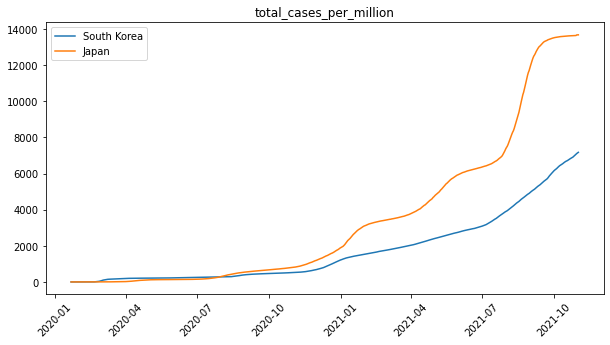

In [ ]:
'''
TASK 2-1: 날짜별 확진자 비율 (total_cases_per_million) 시각화
'''

plt.figure(figsize=(10,5))
plt.title("total_cases_per_million")
plt.plot(kor_covid_data.date, np.array(kor_covid_data.total_cases_per_million), label="South Korea")
plt.plot(jpn_covid_data.date, np.array(jpn_covid_data.total_cases_per_million), label="Japan")
plt.xticks(rotation=45)
plt.legend()

plt.show()




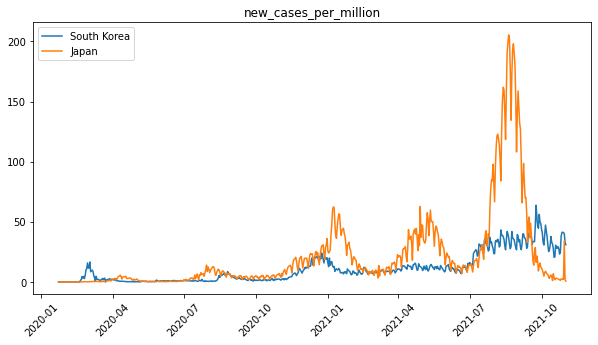

In [ ]:
'''
TASK 2-2: 날짜별 신규 확진자 비율 (new_cases_per_million) 시각화
'''
plt.figure(figsize=(10,5))
plt.title("new_cases_per_million")
plt.plot(kor_covid_data.date, np.array(kor_covid_data.new_cases_per_million), label="South Korea")
plt.plot(jpn_covid_data.date, np.array(jpn_covid_data.new_cases_per_million), label="Japan")
plt.xticks(rotation=45)
plt.legend()

plt.show()

      iso_code  ... excess_mortality_cumulative_per_million
59031      JPN  ...                                     NaN
59032      JPN  ...                                     NaN
59033      JPN  ...                                     NaN
59036      JPN  ...                                     NaN
59038      JPN  ...                                     NaN
...        ...  ...                                     ...
59281      JPN  ...                                     NaN
59283      JPN  ...                                     NaN
59284      JPN  ...                                     NaN
59287      JPN  ...                                     NaN
59288      JPN  ...                                     NaN

[208 rows x 65 columns]


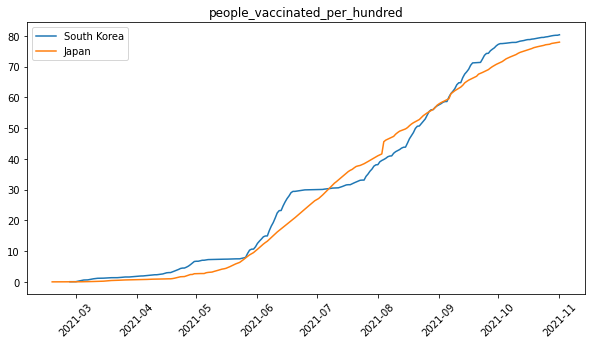

In [ ]:
'''
TASK 2-3: 날짜별 백신 접종자 비율 (people_vaccinated_per_hundred) 시각화
'''
plt.figure(figsize=(10,5))
plt.title("people_vaccinated_per_hundred")

plt.plot(kor_covid_data.date, np.array(kor_covid_data.people_vaccinated_per_hundred), label="South Korea")

#일본 데이터에서 결측치 제거하기
jpn_mVallue_remove = jpn_covid_data.dropna(subset=["people_vaccinated_per_hundred"])
print(jpn_mVallue_remove)

plt.plot(
    jpn_mVallue_remove.date, 
    np.array(jpn_mVallue_remove.people_vaccinated_per_hundred), 
    label="Japan"
)
plt.xticks(rotation=45)
plt.legend()

plt.show()

      iso_code  ... excess_mortality_cumulative_per_million
59052      JPN  ...                                     NaN
59053      JPN  ...                                     NaN
59054      JPN  ...                                     NaN
59057      JPN  ...                                     NaN
59058      JPN  ...                                     NaN
...        ...  ...                                     ...
59281      JPN  ...                                     NaN
59283      JPN  ...                                     NaN
59284      JPN  ...                                     NaN
59287      JPN  ...                                     NaN
59288      JPN  ...                                     NaN

[194 rows x 65 columns]


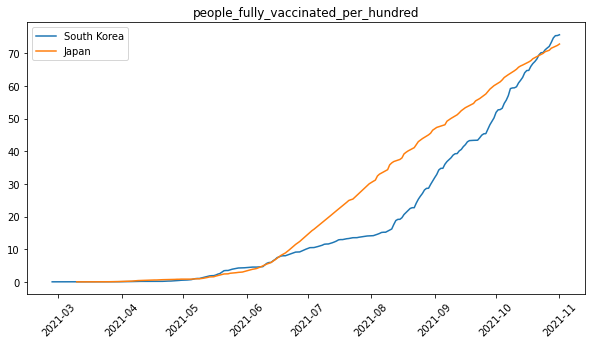

In [ ]:
'''
TASK 2-4:  날짜별 백신 접종 완료자 비율 (people_fully_vaccinated_per_hundred) 시각화
'''
plt.figure(figsize=(10,5))
plt.title("people_fully_vaccinated_per_hundred")
plt.plot(kor_covid_data.date, np.array(kor_covid_data.people_fully_vaccinated_per_hundred), label="South Korea")

#일본 데이터에서 결측치 제거하기
jpn_mVallue_remove = jpn_covid_data.dropna(subset=["people_fully_vaccinated_per_hundred"])
print(jpn_mVallue_remove)

plt.plot(jpn_mVallue_remove.date, np.array(jpn_mVallue_remove.people_fully_vaccinated_per_hundred), label="Japan")
plt.xticks(rotation=45)
plt.legend()

plt.show()

In [ ]:
'''
TASK 3-1: Task 1에서 불러온 데이터에서 다음의 열만 남긴 새로운 데이터프레임 생성하기
'''

covid_data = covid_data[[
          'location',
          'date',
          'total_deaths_per_million',
          'total_cases_per_million',
          'people_vaccinated_per_hundred',
          'human_development_index'
]]

covid_data

,location,date,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,2020-02-24,NaN,0.126,NaN,0.511
1,Afghanistan,2020-02-25,NaN,0.126,NaN,0.511
2,Afghanistan,2020-02-26,NaN,0.126,NaN,0.511
3,Afghanistan,2020-02-27,NaN,0.126,NaN,0.511
4,Afghanistan,2020-02-28,NaN,0.126,NaN,0.511
...,...,...,...,...,...,...
127812,Zimbabwe,2021-10-28,309.763,8804.565,21.91,0.571
127813,Zimbabwe,2021-10-29,309.763,8807.613,21.97,0.571
127814,Zimbabwe,2021-10-30,309.763,8807.613,22.00,0.571
127815,Zimbabwe,2021-10-31,309.962,8810.992,22.02,0.571


In [ ]:
'''
TASK 3-2: 각 국가별로 가장 최근 날짜의 데이터 추출하기
'''
new_covid_data = covid_data.groupby("location", as_index=False).max(["date"])

new_covid_data

,location,total_deaths_per_million,total_cases_per_million,people_vaccinated_per_hundred,human_development_index
0,Afghanistan,182.777,3923.241,6.06,0.511
1,Africa,159.008,6191.136,8.93,NaN
2,Albania,1020.211,64567.094,35.29,0.795
3,Algeria,132.776,4629.799,14.26,0.748
4,Andorra,1680.585,200584.327,70.30,0.868
...,...,...,...,...,...
228,Wallis and Futuna,NaN,NaN,53.52,NaN
229,World,635.699,31383.570,49.63,0.737
230,Yemen,61.986,321.377,1.07,0.470
231,Zambia,193.492,11085.186,1.64,0.584


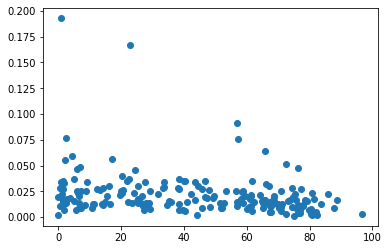

In [ ]:
'''
TASK 3-3: 백신 접종률을 x축, 확진자 비율 대비 사망자 비율을 y축으로하는 scatter plot 그리기
'''


vaccinated_data = new_covid_data["people_vaccinated_per_hundred"]
death_data = new_covid_data["total_deaths_per_million"]/new_covid_data["total_cases_per_million"]



plt.scatter(vaccinated_data, death_data)
plt.show()

In [ ]:
'''
Task 3-4: 백신 접종률과 확진자 비율 대비 사망자 비율 사이의 상관계수 (Pearson Correlation Coefficient) 구하기 (함수 직접 구현)
'''
def pearson_similarity(vac, det):
  vac_c = vac - vac.mean()
  det_c = det - det.mean()
  denom = np.sqrt(np.sum(vac_c**2)*np.sum(det_c ** 2))
  if denom != 0:
    return np.sum(vac_c * det_c)/denom
  else:
    return 0

print(pearson_similarity(vaccinated_data, death_data))

-0.23185178247436014


In [ ]:
'''
Task 4-1: Task 3-1에서 생성한 데이터프레임을 활용하여 HDI 계수와 백신 접종률 사이의
상관계수 (Pearson Correlation Coefficient) 구하기 (Task 3-4에서 구현한 함수 사용 혹은 기타
다른 방법 활용 가능)
'''

hdi_data = new_covid_data["human_development_index"]
vaccinated_data = new_covid_data["people_vaccinated_per_hundred"]

print(pearson_similarity(vaccinated_data, hdi_data))

0.7250351729877785


In [ ]:
'''
Task 4-2: Linear Regression 방법으로 HDI 계수와 백신 접종률 사이의 선형 관계 학습하기 (y = wx + b 에서 w값과 b값 구하기)
'''
def Linear_Regression(x_train, y_train,W,b, learning_rate=0.01, epoch=5001):
  optimizer = optim.Adam([W,b], lr=learning_rate)

  for e in range(epoch):
    W.requires_grad_(True)
    b.requires_grad_(True)

    hypothesis = torch.mm(x_train, W)+b
    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if e%1000 == 0:
      print(f"epoch:{e},cost: {cost.item()}")

  return W, b


#결측치 제거
drop_covid_data = new_covid_data.dropna(subset=["human_development_index","people_vaccinated_per_hundred"])

x = torch.FloatTensor(drop_covid_data["human_development_index"]) #hdi계수 = x
y = torch.FloatTensor(drop_covid_data["people_vaccinated_per_hundred"]) #백신접종률 = y

x = torch.unsqueeze(x, 1)
y = torch.unsqueeze(y, 1)

print(x.size())
print(y.size())

W = torch.zeros(1,1)
b = torch.zeros(1,1)

W, b = Linear_Regression(x,y, W,b, learning_rate=0.05, epoch = 10001)

torch.Size([186, 1])
torch.Size([186, 1])
epoch:0,cost: 2542.06787109375
epoch:1000,cost: 581.1558227539062
epoch:2000,cost: 534.6945190429688
epoch:3000,cost: 470.3109130859375
epoch:4000,cost: 395.17681884765625
epoch:5000,cost: 325.4727478027344
epoch:6000,cost: 276.904052734375
epoch:7000,cost: 253.85618591308594
epoch:8000,cost: 247.7445831298828
epoch:9000,cost: 247.12088012695312
epoch:10000,cost: 247.1077423095703


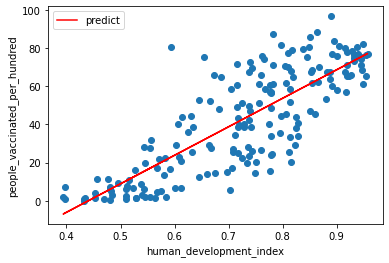

In [ ]:
'''
Task 4-3: HDI 계수를 x축으로, 백신 접종률을 y축으로하는 scatter plot과, Task 4-2에서
학습한 직선을 겹쳐 그리기 (scatter plot과 직선이 일치하는지 확인하여 학습이 제대로 되었는지
확인)
'''

plt.scatter(x,y)

W.requires_grad_(False)
b.requires_grad_(False)

predict = torch.mm(x,W)+b

plt.plot(x, predict, c="#ff0000", label="predict")
plt.legend()
plt.xlabel("human_development_index")
plt.ylabel("people_vaccinated_per_hundred")
plt.show()